## Data Challenge

#### Necessary imports

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

%matplotlib inline

### Loading data

In [7]:
detailig = pd.read_excel('4P Detailing.xlsx')
display = pd.read_excel('4P Display.xlsx')
contracts = pd.read_excel('Contract Compliance.xlsx')
pharmacies  = pd.read_excel('Pharmacy.xlsx')
ims = pd.read_csv('IMS Aggregte for PowerBI.csv')

### Preview to check if data were read correctly

In [8]:
contracts.head(10)

OneKey ID Short OneKey Contract Contract Type Display Compliant  \
0  WUKF00577784    F00577784      Yes      STANDARD     Non Compliant   
1  WUKF00656611    F00656611                            Non Compliant   
2  WUKF00599986    F00599986                            Non Compliant   
3  WUKF04529563    F04529563                            Non Compliant   
4  WUKF00000908    F00000908                            Non Compliant   
5  WUKF00652774    F00652774                            Non Compliant   
6  WUKF08761045    F08761045      Yes      STANDARD     Non Compliant   
7  WUKF00001146    F00001146      Yes      STANDARD     Non Compliant   
8  WUKF00668308    F00668308      Yes      STANDARD     Non Compliant   
9  WUKF00668285    F00668285      Yes      STANDARD     Non Compliant   

  MSL Distribution Compliant  Contract Rebate  
0                  Compliant         0.000000  
1              Non Compliant         0.000000  
2              Non Compliant         0.000000  
3              Non Compliant         0.000000  
4              Non Compliant         0.000000  
5              Non Compliant         0.000000  
6                  Compliant       145.164822  
7                  Compliant         0.000000  
8                  Compliant         0.000000  
9                  Compliant       135.692025

### Joind sales information with pharmacies data and contracts by particular keys

In [9]:
sales = ims.merge(pharmacies, left_on='OneKey', right_on='Short OneKey')
# sales.head(10)
sales = sales[['OneKey','SalesValue','SalesDate', 'OneKey ID']].merge(contracts, left_on='OneKey', right_on='Short OneKey')
sales.head(10)

OneKey  SalesValue  SalesDate   OneKey ID_x   OneKey ID_y Short OneKey  \
0  F00000033        7.10   20170101  WUKF00000033  WUKF00000033    F00000033   
1  F00000033       26.03   20170101  WUKF00000033  WUKF00000033    F00000033   
2  F00000033       44.65   20170101  WUKF00000033  WUKF00000033    F00000033   
3  F00000033      232.80   20170101  WUKF00000033  WUKF00000033    F00000033   
4  F00000033        3.88   20170101  WUKF00000033  WUKF00000033    F00000033   
5  F00000033        2.48   20170101  WUKF00000033  WUKF00000033    F00000033   
6  F00000033       92.16   20170101  WUKF00000033  WUKF00000033    F00000033   
7  F00000033       65.85   20170101  WUKF00000033  WUKF00000033    F00000033   
8  F00000033        0.00   20170201  WUKF00000033  WUKF00000033    F00000033   
9  F00000033       28.84   20170201  WUKF00000033  WUKF00000033    F00000033   

  Contract Contract Type Display Compliant MSL Distribution Compliant  \
0                            Non Compliant              Non Compliant   
1                            Non Compliant              Non Compliant   
2                            Non Compliant              Non Compliant   
3                            Non Compliant              Non Compliant   
4                            Non Compliant              Non Compliant   
5                            Non Compliant              Non Compliant   
6                            Non Compliant              Non Compliant   
7                            Non Compliant              Non Compliant   
8                            Non Compliant              Non Compliant   
9                            Non Compliant              Non Compliant   

   Contract Rebate  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6              0.0  
7              0.0  
8              0.0  
9              0.0

### Change string to real date

In [10]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'], format='%Y%m%d')

### Show unique values of date to check correctness

In [11]:
np.unique(sales['SalesDate'].values)

array(['2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

### Repleace ' ' (space sign) with 'No' to make notation coherent

In [12]:
sales['Contract'] = sales['Contract'].replace(' ', 'No')

## Question 1: If contracted pharmacies show better growth than non-contracted ones

D:\Apps\Anaconda3\envs\env1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


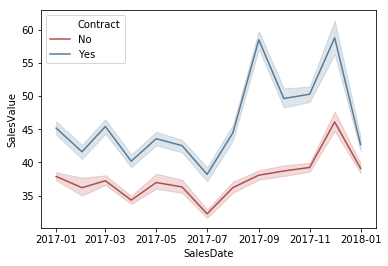

In [14]:
sales_group_by_contract = sales.sort_values('SalesDate').groupby(['Contract'])

contracted_sales = sales_group_by_contract.get_group('Yes')
contracted_sales.index = pd.to_datetime(contracted_sales.index)

no_contracted_sales = sales_group_by_contract.get_group('No')
no_contracted_sales.index = pd.to_datetime(no_contracted_sales.index)

fig, ax = plt.subplots()
lineplot = sns.lineplot(data=sales,x='SalesDate',y='SalesValue',ax=ax,hue='Contract',
                        palette=sns.color_palette("Set1", n_colors=2, desat=.5))

## Question 2: If displays result in improved sales growth

In [55]:
sales_displays = sales.merge(display,left_on='OneKey ID_x', right_on='ONEKEY_ID').sort_values('SalesDate')
sales_displays = sales_displays[['OneKey','SalesDate','SalesValue','OneKey ID_x','Primary Display Achievement Denominator','Secondary Display Achievement Denominator',
                                'PD Brand Block Achievement Numerator','PD Eye Level Achievement Numerator','PD Shelf Tray Achievement Numerator',
                                'SD FSDU Achievement Numerator','SD CTU Achievement Numerator']]
sales_displays.head(10)

OneKey  SalesDate  SalesValue   OneKey ID_x  \
0        F00000040 2017-01-01      152.76  WUKF00000040   
6860188  F03607708 2017-01-01       60.80  WUKF03607708   
6860187  F03607708 2017-01-01       60.80  WUKF03607708   
6860186  F03607708 2017-01-01       60.80  WUKF03607708   
6860185  F03607708 2017-01-01       60.80  WUKF03607708   
6860184  F03607708 2017-01-01        3.99  WUKF03607708   
6860183  F03607708 2017-01-01        3.99  WUKF03607708   
6860182  F03607708 2017-01-01        3.99  WUKF03607708   
6860181  F03607708 2017-01-01        3.99  WUKF03607708   
6860189  F03607708 2017-01-01       60.80  WUKF03607708   

         Primary Display Achievement Denominator  \
0                                              3   
6860188                                        4   
6860187                                        4   
6860186                                        4   
6860185                                        4   
6860184                                        4   
6860183                                        4   
6860182                                        4   
6860181                                        4   
6860189                                        4   

         Secondary Display Achievement Denominator  \
0                                                3   
6860188                                          0   
6860187                                          0   
6860186                                          0   
6860185                                          0   
6860184                                          0   
6860183                                          0   
6860182                                          0   
6860181                                          0   
6860189                                          0   

         PD Brand Block Achievement Numerator  \
0                                           0   
6860188                                     1   
6860187                                     1   
6860186                                     1   
6860185                                     1   
6860184                                     1   
6860183                                     1   
6860182                                     1   
6860181                                     1   
6860189                                     1   

         PD Eye Level Achievement Numerator  \
0                                         0   
6860188                                   0   
6860187                                   0   
6860186                                   1   
6860185                                   1   
6860184                                   1   
6860183                                   0   
6860182                                   1   
6860181                                   1   
6860189                                   1   

         PD Shelf Tray Achievement Numerator  SD FSDU Achievement Numerator  \
0                                          0                              1   
6860188                                    0                              0   
6860187                                    0                              0   
6860186                                    0                              0   
6860185                                    0                              0   
6860184                                    1                              0   
6860183                                    0                              0   
6860182                                    0                              0   
6860181                                    0                              0   
6860189                                    1                              0   

         SD CTU Achievement Numerator  
0                                   0  
6860188                             0  
6860187                             0  
6860186                             0  
6860185                             0  
6860184                   

### Plot sales growth with respect to different number of primary displays

D:\Apps\Anaconda3\envs\env1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


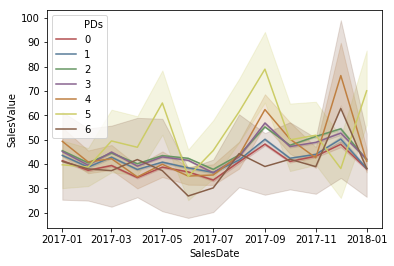

In [66]:
fig, ax = plt.subplots()
# Sum all primary displays (numerators in 4P display.xslx)
sales_displays['PDs'] = sales_displays[['PD Brand Block Achievement Numerator','PD Eye Level Achievement Numerator','PD Shelf Tray Achievement Numerator']].sum(axis=1)
# sales_displays_primary_displays_max = sales_displays[np.any([sales_displays['Primary Display Achievement Denominator'] == 14,
#                                                      sales_displays['Primary Display Achievement Denominator'] == 3],axis=0)]
# lineplot = sns.lineplot(data=sales_displays_primary_displays_max,x='SalesDate',y='SalesValue',ax=ax,hue='PD Brand Block Achievement Numerator',
#                        palette = sns.color_palette("Set1", n_colors=2, desat=.5))
values = len(sales_displays['PDs'].unique())
lineplot = sns.lineplot(data=sales_displays,x='SalesDate',y='SalesValue',ax=ax,hue='PDs',
                       palette = sns.color_palette("Set1", n_colors=values, desat=.5))

### Median SalesValue grouped by number of PDs

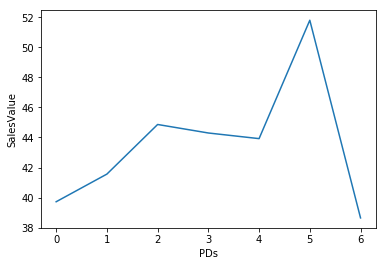

In [75]:
sns.lineplot(data=sales_displays, x='PDs', y='SalesValue', ci=None)

One may notice above very wide confidence intervals for higher values of primary displays what indicate high variation in sales value for those pharmacies having more than 3 PD. On the other hand, confidence interval for pharmacies with lower number of PDs shows very low variation. On average, sales values oscilate. However, it may be seen that the more PDs is present, the higher SalesValue is. For PDs at the level of 5 and 6, SalesValue have large amplitude. o clearly conclude about PDs influence of SalesValue, another plot showing dependency between median SalesValue and a number of PDs was created. In summary, it may be concluded that PDs slightly influence increase of SalesValue.

### Plot sales growth with respect to different number of secondary displays

D:\Apps\Anaconda3\envs\env1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


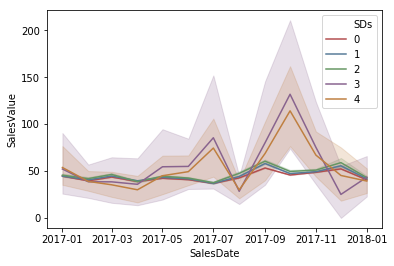

In [67]:
fig, ax = plt.subplots()
sales_displays['SDs'] = sales_displays[['SD FSDU Achievement Numerator','SD CTU Achievement Numerator']].sum(axis=1)
# sales_displays_secondary_displays_max = sales_displays[np.any([sales_displays['Secondary Display Achievement Denominator'] == 0,
#                                                      sales_displays['Secondary Display Achievement Denominator'] == 6],axis=0)]
values = len(sales_displays['SDs'].unique())
lineplot = sns.lineplot(data=sales_displays,x='SalesDate',y='SalesValue',ax=ax,hue='SDs',
                       palette = sns.color_palette("Set1", n_colors=values, desat=.5))

### Median SalesValue grouped by number of SDs

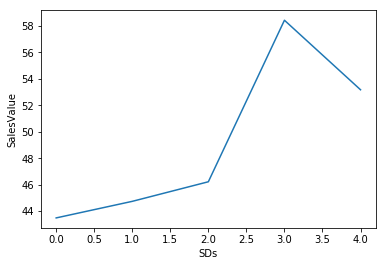

In [76]:
sns.lineplot(data=sales_displays, x='SDs', y='SalesValue', ci=None)

In case of Secondary Displays (SDs) SalesValue tend to behave similarily as in case of PDs. In two cases higher number of SDs wreaked lower level of SalesValue. Nonetheless, in general